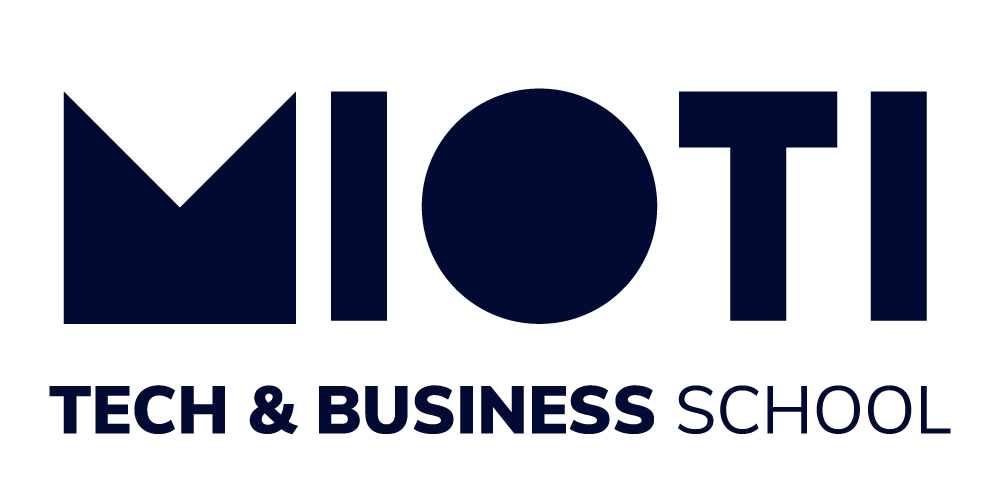
<center style="color:#888">Asignatura: Predictive Analytics</center>

# Challenge S1: Introducción a las series Temporales

## 0. Objetivo

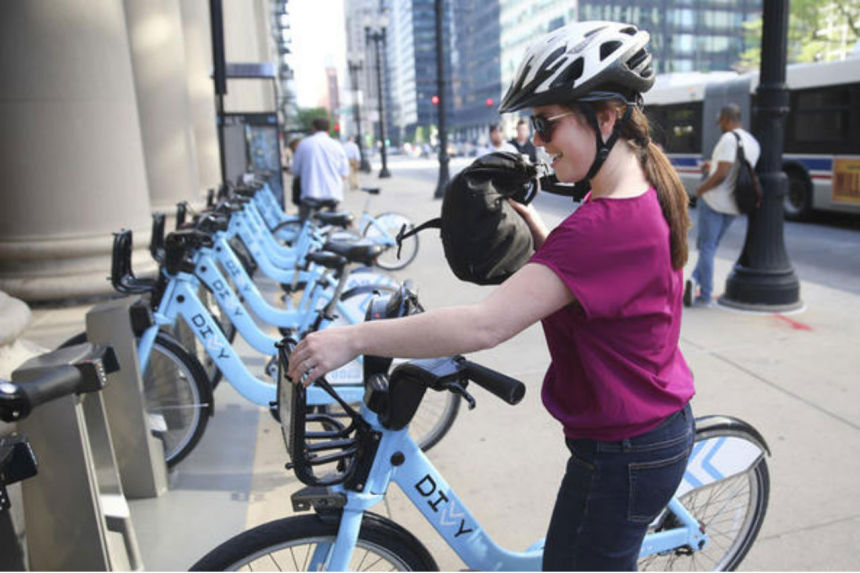</img>
El objetivo de este challenge es realizar el análisis de una serie temporal y eliminar sus componentes de estacionalidad y tendencia.

Vamos a utilizar el dataset de los alquileres de bicicletas de Chicago, pero en este caso utilizaremos como serie temporal el número de **alquileres de los usuarios registrados**.

Además, realizaremos el análisis con los **datos a nivel horario**, es decir: sin agrupar.

## 1. Preparar el contexto

Como paso previo, cargamos las librerías que serán necesarias en nuestro estudio.

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2. Pretratado de los datos

Recuerda que en este ejercicio, debemos leer nuestro fichero y crear un dataframe con la serie temporal que incluya nuestra variable tiempo y el número de alquileres de usuarios registrados.

In [38]:
## Carga del fichero
df = pd.read_csv("hour_chicago.csv")

In [39]:
# Explorar estructura
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date_str    17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   hum         17379 non-null  float64
 10  windspeed   17379 non-null  float64
 11  casual      17379 non-null  int64  
 12  registered  17379 non-null  int64  
 13  cnt         17379 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 1.9+ MB


,date_str,season,yr,mnth,hr,holiday,weekday,workingday,temp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,0.24,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,0.22,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,0.22,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,0.24,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,0.24,0.75,0.0,0,1,1


In [40]:
## Creación de la variable tiempo
df['date_str'] = pd.to_datetime(df['date_str'])

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date_str    17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   yr          17379 non-null  int64         
 3   mnth        17379 non-null  int64         
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   temp        17379 non-null  float64       
 9   hum         17379 non-null  float64       
 10  windspeed   17379 non-null  float64       
 11  casual      17379 non-null  int64         
 12  registered  17379 non-null  int64         
 13  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(10)
memory usage: 1.9 MB


In [42]:
## Creación del dataframe con nuestra serie temporal
# Crear un dataframe con la serie temporal que incluya la variable tiempo y el número de alquileres de usuarios registrados
df_temporal = df[['date_str', 'registered']].copy()
df_temporal.columns = ['fecha', 'alquileres_registrados']
df_temporal = df_temporal.sort_values('fecha')

In [43]:
# Configurar la columna de fecha como índice
df_temporal.set_index('fecha', inplace=True)

In [44]:
df_temporal

,alquileres_registrados
fecha,
2011-01-01,13
2011-01-01,24
2011-01-01,17
2011-01-01,31
2011-01-01,25
...,...
2012-12-31,13
2012-12-31,30
2012-12-31,48


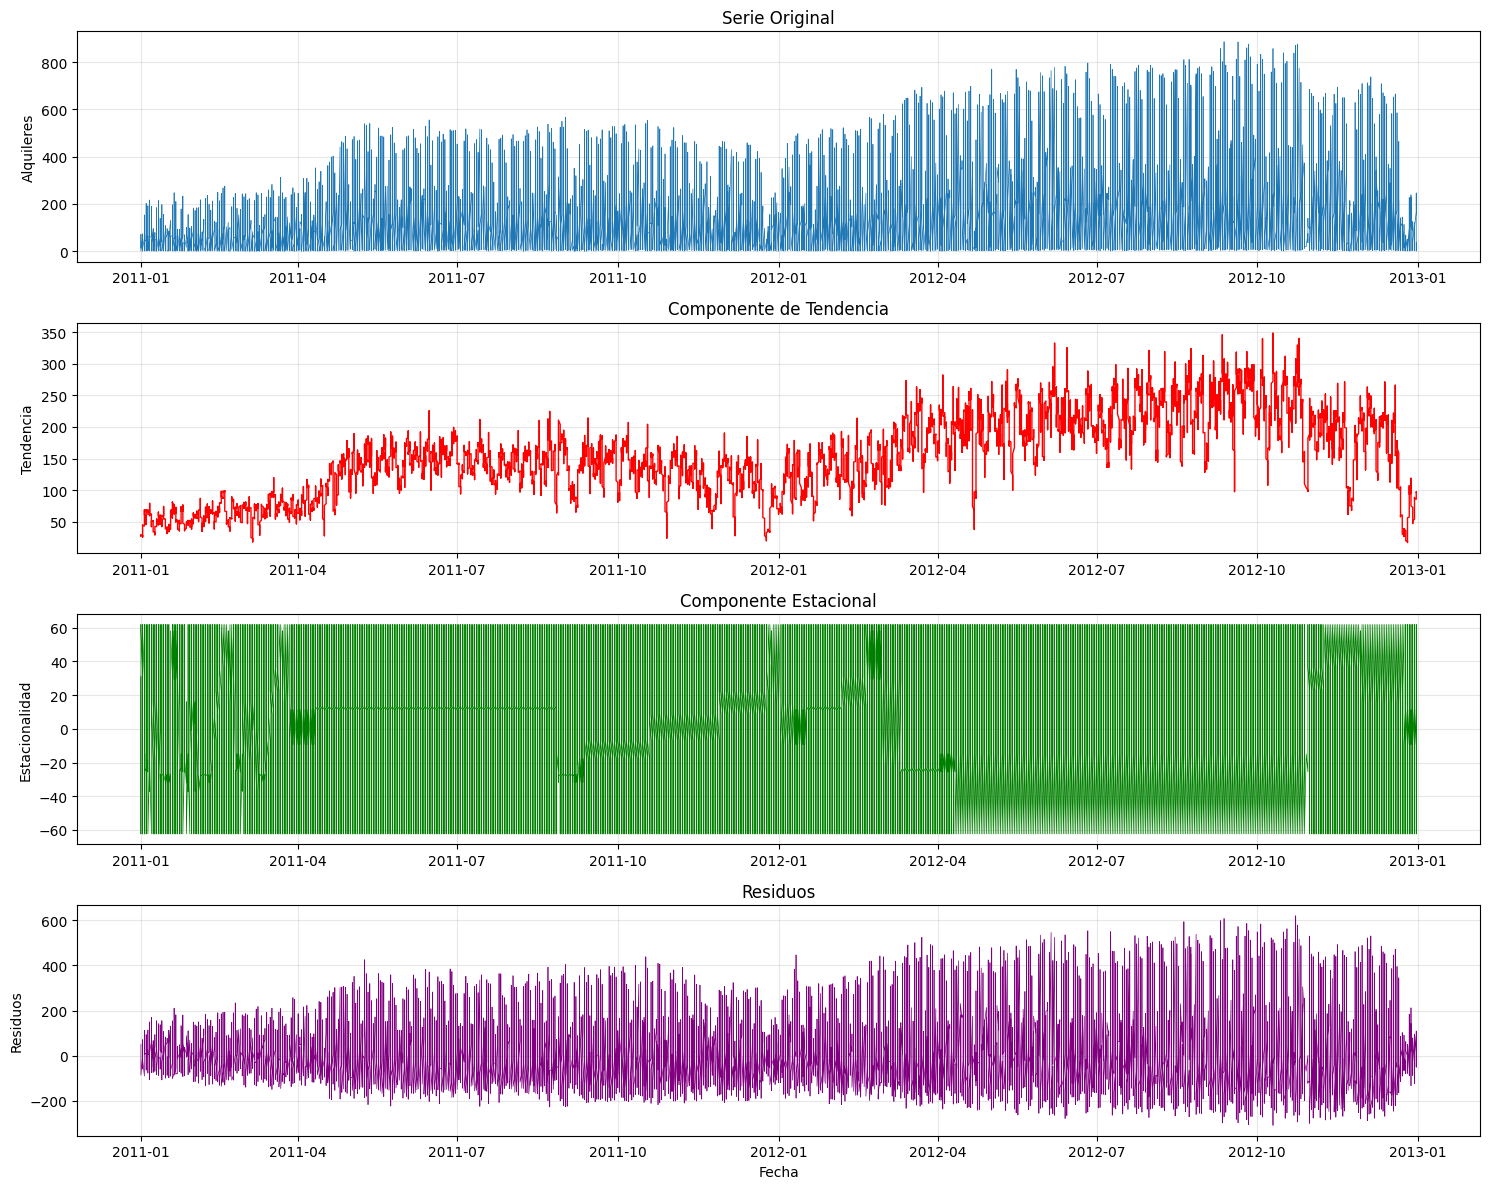

In [45]:
# Análisis de componentes de la serie temporal

# 1. Descomposición de la serie temporal para identificar componentes
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df_temporal['alquileres_registrados'], 
                                 model='additive', 
                                 period=24)

# Crear figura con subplots para mostrar todos los componentes
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12))

# Serie original
ax1.plot(df_temporal.index, df_temporal['alquileres_registrados'], linewidth=0.5)
ax1.set_title('Serie Original', fontsize=12)
ax1.set_ylabel('Alquileres')
ax1.grid(True, alpha=0.3)

# Tendencia
ax2.plot(df_temporal.index, decomposition.trend, linewidth=1, color='red')
ax2.set_title('Componente de Tendencia', fontsize=12)
ax2.set_ylabel('Tendencia')
ax2.grid(True, alpha=0.3)

# Estacionalidad
ax3.plot(df_temporal.index, decomposition.seasonal, linewidth=0.5, color='green')
ax3.set_title('Componente Estacional', fontsize=12)
ax3.set_ylabel('Estacionalidad')
ax3.grid(True, alpha=0.3)

# Residuos
ax4.plot(df_temporal.index, decomposition.resid, linewidth=0.5, color='purple')
ax4.set_title('Residuos', fontsize=12)
ax4.set_ylabel('Residuos')
ax4.set_xlabel('Fecha')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



## 3. Componentes de una serie temporal

**P: ¿Qué componentes tiene nuestra serie temporal?**

RP: 
1. Tendencia: La serie muestra una tendencia creciente general a largo plazo (en 2011–2012 se aprecia un crecimiento global).
2. Estacionalidad: Patrones cíclicos regulares (diarios y semanales)
3. Residuos: Variabilidad aleatoria alrededor de la tendencia y estacionalidad

**P: ¿Hay más de un tipo de estacionalidad?**

RP: Sí. Se observan dos estacionalidades claras:

1.	Diaria (periodo = 24 h): los picos correspondientes a horas punta de cada día.
2.	Semanal (periodo = 7 días = 168 h): variaciones según el día de la semana.

### 3.1. Si existe componente estacional, elimínala y representa los resultados.

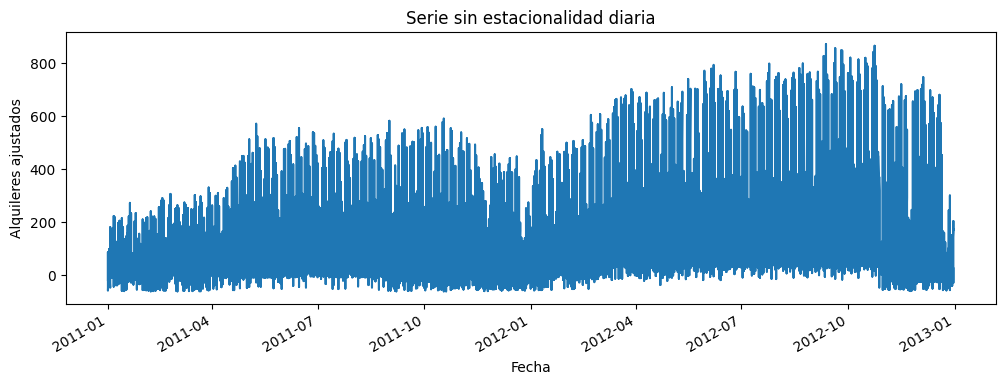

In [46]:
df_sin_estacional = df_temporal['alquileres_registrados'] - decomp_daily.seasonal

plt.figure(figsize=(12,4))
df_sin_estacional.plot()
plt.title('Serie sin estacionalidad diaria')
plt.xlabel('Fecha')
plt.ylabel('Alquileres ajustados')
plt.show()

### 3.2. Si existe tendencia, elimínala y representa los resultados.

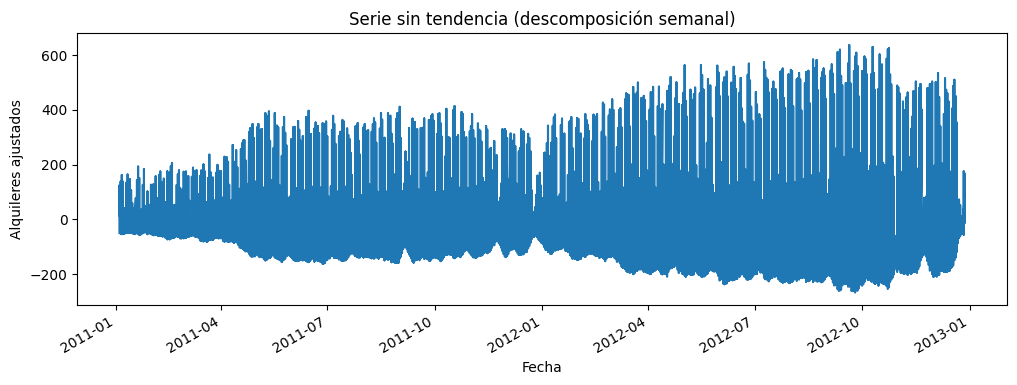

In [47]:
ts_sin_tendencia = df_temporal['alquileres_registrados'] - decomp_weekly.trend

plt.figure(figsize=(12,4))
ts_sin_tendencia.plot()
plt.title('Serie sin tendencia (descomposición semanal)')
plt.xlabel('Fecha')
plt.ylabel('Alquileres ajustados')
plt.show()